In [2]:
import pandas as pd
from transformers import AutoModel
import torch
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import defaultdict
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [3]:
model = AutoModel.from_pretrained("jinaai/jina-embeddings-v3", trust_remote_code=True)

C:\Users\Amir\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [19]:
file_path = "D:/ClusteringProject/reasons.xlsx"
colums_to_use = [2]

# for pd.read_excel
names=['دلایل انصراف'] 

In [27]:
data = pd.read_excel(file_path, usecols=colums_to_use, header = None, keep_default_na=False, dtype=list)
text = np.reshape(data, 1274*1)

array(['یک نواخت شدن مباحث', 'ویروس آنفولانزا گرفتند',
       'ولی خیلی صحبت کردم شاید تصمیمش ن عوض شود و ادامه دهند', ...,
       'هماهنگی با روحیهات ندارد پرداخت جریمه مشکل داشتند',
       'همسرشون جراحی داشتند و بعد هم. وسواس شکست دارند',
       'همسرشون در دوره قبل شرکت کرده بودند و ایشون از تفکرات جدید همسرشون ناراحت شده بودن به همین دلیل دوره را رها کردند البته قرارشد باز دوره را شروع کنند'],
      dtype=object)

In [28]:
embed = model.encode(text, task="text-matching")

In [29]:
db=pd.DataFrame(embed)
db.to_csv('embedding.csv', index=False)

In [30]:
embedding = np.array(pd.read_csv('embedding.csv'))

In [31]:
embeddings_np = torch.tensor(embedding).numpy()

In [32]:
max_k = 40
min_k = 12
kmeans_clustering = []
kmeans_labels =[]
k_sil_scores = []
K_WCSS = []
k_davies_scores = []

for i in range (min_k,max_k+1):
    kmeans = KMeans(n_clusters=i, random_state=40, init='k-means++', n_init='auto')
    clustering = kmeans.fit_predict(embeddings_np)
    sil_score = silhouette_score(embeddings_np, clustering)
    davies_score = davies_bouldin_score(embeddings_np, clustering)
    
    kmeans_clustering.append(kmeans)
    kmeans_labels.append(clustering)
    k_sil_scores.append(sil_score)
    k_davies_scores.append(davies_score)
    K_WCSS.append(kmeans.inertia_)

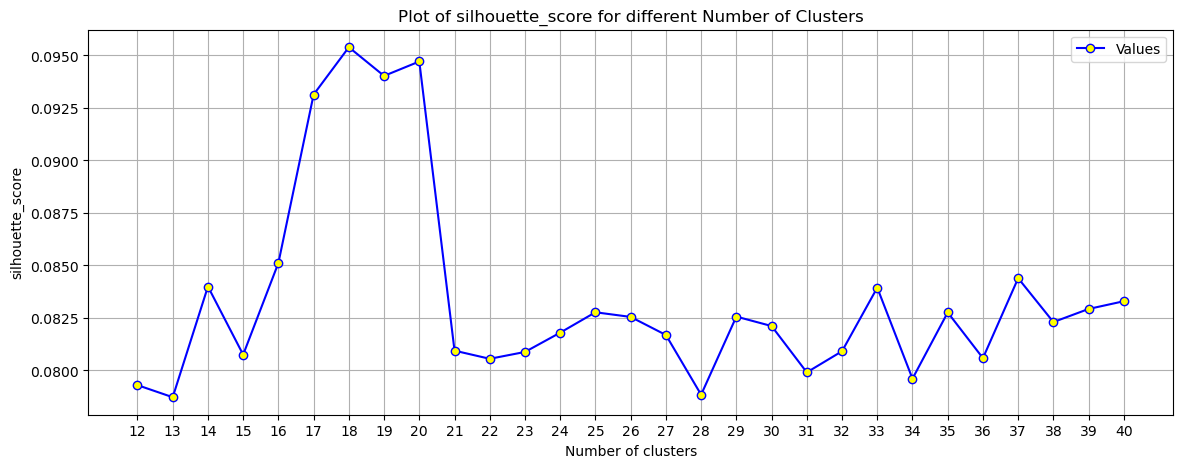

In [33]:
num_of_clusters=list(range(min_k,max_k+1))
plt.figure(figsize=(14, 5))  # Set the figure size
plt.plot(num_of_clusters, k_sil_scores, marker='o', mfc='yellow', linestyle='-', color='b', label='Values')

plt.xticks(range(min(num_of_clusters), max(num_of_clusters) + 1, 1))

plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.title('Plot of silhouette_score for different Number of Clusters')

plt.grid(True)

plt.legend()

plt.show()

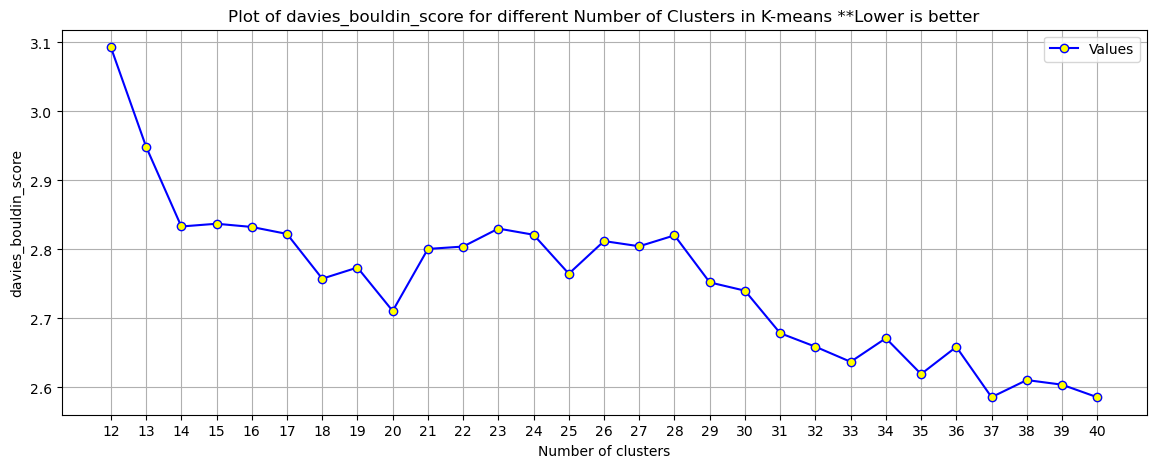

In [34]:
plt.figure(figsize=(14, 5))  # Set the figure size
plt.plot(num_of_clusters, k_davies_scores, marker='o', mfc='yellow', linestyle='-', color='b', label='Values')

plt.xticks(range(min(num_of_clusters), max(num_of_clusters) + 1, 1))

plt.xlabel('Number of clusters')
plt.ylabel('davies_bouldin_score')
plt.title('Plot of davies_bouldin_score for different Number of Clusters in K-means **Lower is better')

plt.grid(True)

plt.legend()

plt.show()

In [35]:
k_optimal = 20

kmeans = KMeans(n_clusters=k_optimal, random_state=40, n_init=10)
clusters = kmeans.fit_predict(embeddings_np)

data.columns = ['reason'] 
data['Cluster'] = clusters

data.to_excel("clustered_reasons.xlsx", index=False)

print("clusters succesfully saved")

clusters succesfully saved


In [37]:
grouped_reasons = data.groupby('Cluster')['reason'].apply(list).reset_index()

for index, row in grouped_reasons.iterrows():
    print(f"Cluster {row['Cluster']}:")
    print('\n'.join(list(set(row['reason']))))
    print("." * 100)

Cluster 0:
مشغله زیاد و تنبلی
مشکل کاری داشتم که وقتم رو زیاد می گرفت
مشغله شغلی داشتم و در حال برنامه ریزی هستم
من شغلم طوری هست برام خیلی سخت بود ولی حتما توی فکر هستم
مشقله کاری زیاد باعث شد در دیدن جلسات وقفه بیفتد
شغلم عوض شد و توی مسیر قرار شد گوش بده
کارمند هستند درگیر دوره را بی نظم مشاهده می‌کند البته قرار شد اصلاح شود
درگیر شغل شیفتی هستند در مورد مشرح از استاد بپرسم
به دلیل مشغله زیاد
مغازه دار هستم و یه مدتی کارم زیاد شده بود
پروژه ای رو باید تحویل می دادم که کل وقت منو گرفته بود
به خاطر شرایط کاری وقفه افتاد ولی با شماره دیگه ای شروع کردم
مشغله کاری و وقت نداشتن باعث وقفه شد
به خاطر شرایط شغلی عقب افتاد
مشکلات کاری پیش اومده بود
من کارگر معدن هستم و انتن نداشتم
جابه جایی شغلی داشتم و بنایی هم پیش اومده بود
شرایط شغلی من که شش صبح تا 11 شب هست باعث شد وقفه بیفته
به خاطر مشغله کاری به هیچ وجه نمی رسم
ترکیه بودم و کاری داشتم و ده روزی هست برگشتم و سرم شلوغ
مشکلات کاریم زیاد بود و امروز فردا می شد
مشغله کاری باعث وقفه شد
کاری پیش اومده بود و جلسات عقب افتاد
از نظر زمانی واقعا 